In [584]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, train_test_split
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from pandas import DataFrame

In [525]:
data = pd.read_csv("kickstarter_data.csv")
data['success_rate'] = data['pled'] / data['goal']
data.columns, data.shape

(Index(['Unnamed: 0', 'URL', 'pled', 'goal', 'date', 'period', 'status',
        'text_am', 'n_img', 'n_vid', 'n_pled_t', 'min_pled_t', 'max_pled_t',
        'mean_pled_t', 'step_pled_t', 'cr_time', 'backed', 'created', 'site',
        'rpg', 'platformer', 'shooter', 'fighting', 'survival', 'horror',
        'strategy', 'arcade', 'simulator', 'mmo', 'indie', 'action', 'quest',
        'adventure', 'mgp', 'cont', 'curr', 'succsess', 'is_site',
        'success_rate'],
       dtype='object'),
 (8421, 39))

In [526]:
df = data
if 'Unnamed: 0' in df.columns or 'succsess' in df.columns:
    df = data.drop(columns=['Unnamed: 0', 'succsess'])
df['site'] = df['site'].fillna('')
df.shape

(8421, 37)

In [527]:
print(df[df['is_site'] == 1]['success_rate'].median(), df[df['is_site'] == 1]['success_rate'].mean())
print(df[df['is_site'] == 0]['success_rate'].median(), df[df['is_site'] == 0]['success_rate'].mean())

0.1360499272594055 9.154625363297395
0.0154 2.175598071346449


In [528]:
df.isnull().sum()

URL             0
pled            0
goal            0
date            0
period          0
status          0
text_am         0
n_img           0
n_vid           0
n_pled_t        0
min_pled_t      0
max_pled_t      0
mean_pled_t     0
step_pled_t     0
cr_time         0
backed          0
created         0
site            0
rpg             0
platformer      0
shooter         0
fighting        0
survival        0
horror          0
strategy        0
arcade          0
simulator       0
mmo             0
indie           0
action          0
quest           0
adventure       0
mgp             0
cont            0
curr            0
is_site         0
success_rate    0
dtype: int64

In [529]:
numeric_columns = ['pled',
  'goal',
  'period',
  'text_am',
  'n_img',
  'n_vid',
  'n_pled_t',
#   'min_pled_t',
#   'max_pled_t',
#   'mean_pled_t',
  'step_pled_t',
  'cr_time',
  'backed',
  'created',
  'mgp',
  'cont']
binary_columns = ['rpg',
  'platformer',
  'shooter',
  'fighting',
  'survival',
  'horror',
  'strategy',
  'arcade',
  'simulator',
  'mmo',
  'indie',
  'action',
  'quest',
  'adventure',
  'is_site']
target_column = 'success_rate'
numeric_columns, traget_column

(['pled',
  'goal',
  'period',
  'text_am',
  'n_img',
  'n_vid',
  'n_pled_t',
  'step_pled_t',
  'cr_time',
  'backed',
  'created',
  'mgp',
  'cont'],
 'success_rate')

In [530]:
def draw_boxplots(df, numeric_columns):
    fig, axes = plt.subplots(4, 4, figsize=(18, 40))
    for i in range(4):
        for j in range(4):
            if 4 * i + j == len(numeric_columns):
                return
            axes[i, j].boxplot(df[numeric_columns[4 * i + j]], labels=[numeric_columns[4 * i + j]])       

In [531]:
def draw_hist(df, numeric_columns, bar_type=None):
    bar_type = 'bar' if bar_type == None else bar_type
    fig, axes = plt.subplots(4, 4, figsize=(18, 20))
    for i in range(4):
        for j in range(4):
            if 4 * i + j == len(numeric_columns):
                return
            axes[i, j].hist(df[numeric_columns[4 * i + j]], label=numeric_columns[4 * i + j], histtype=bar_type, bins=10)
            axes[i,j].legend()

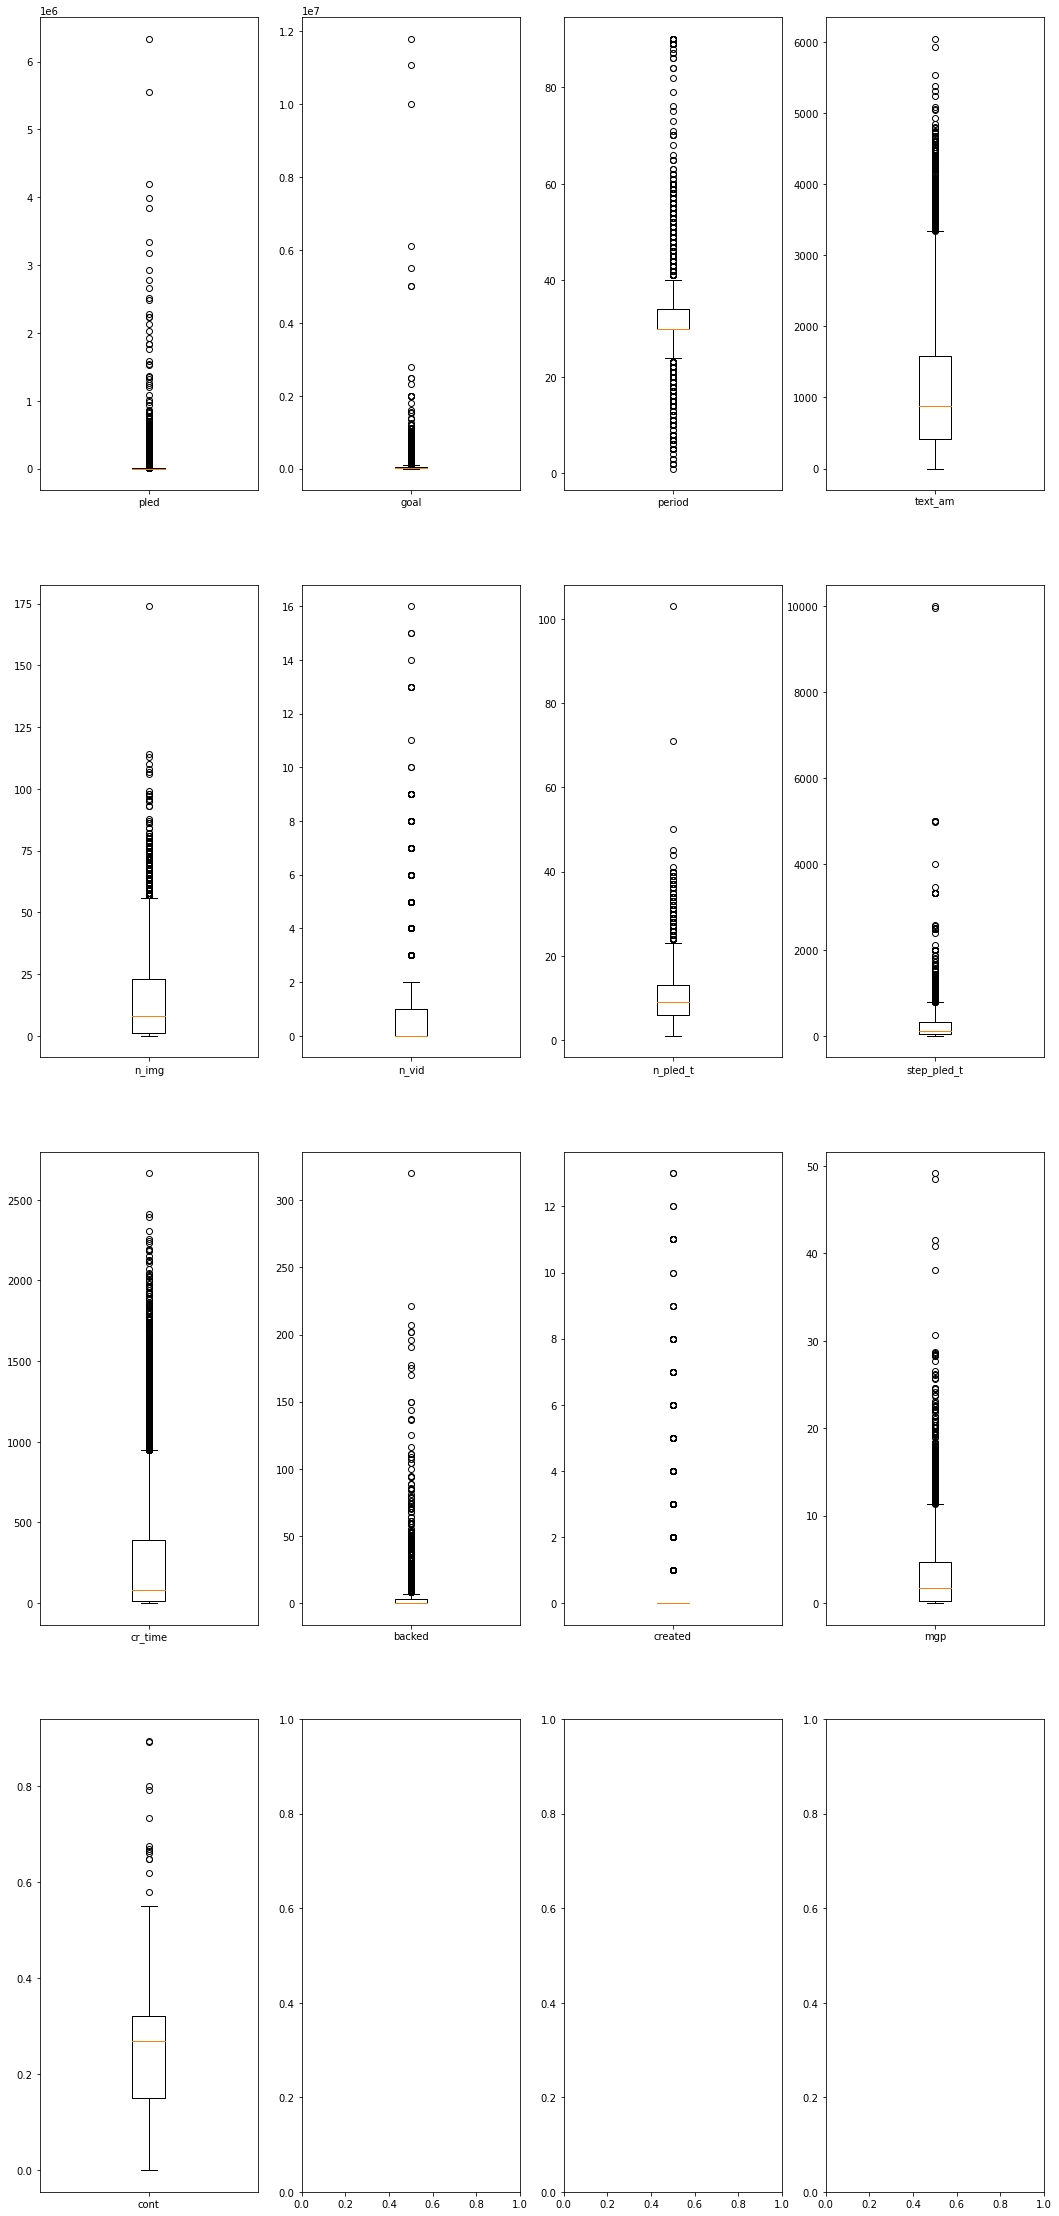

In [532]:
draw_boxplots(df, numeric_columns)

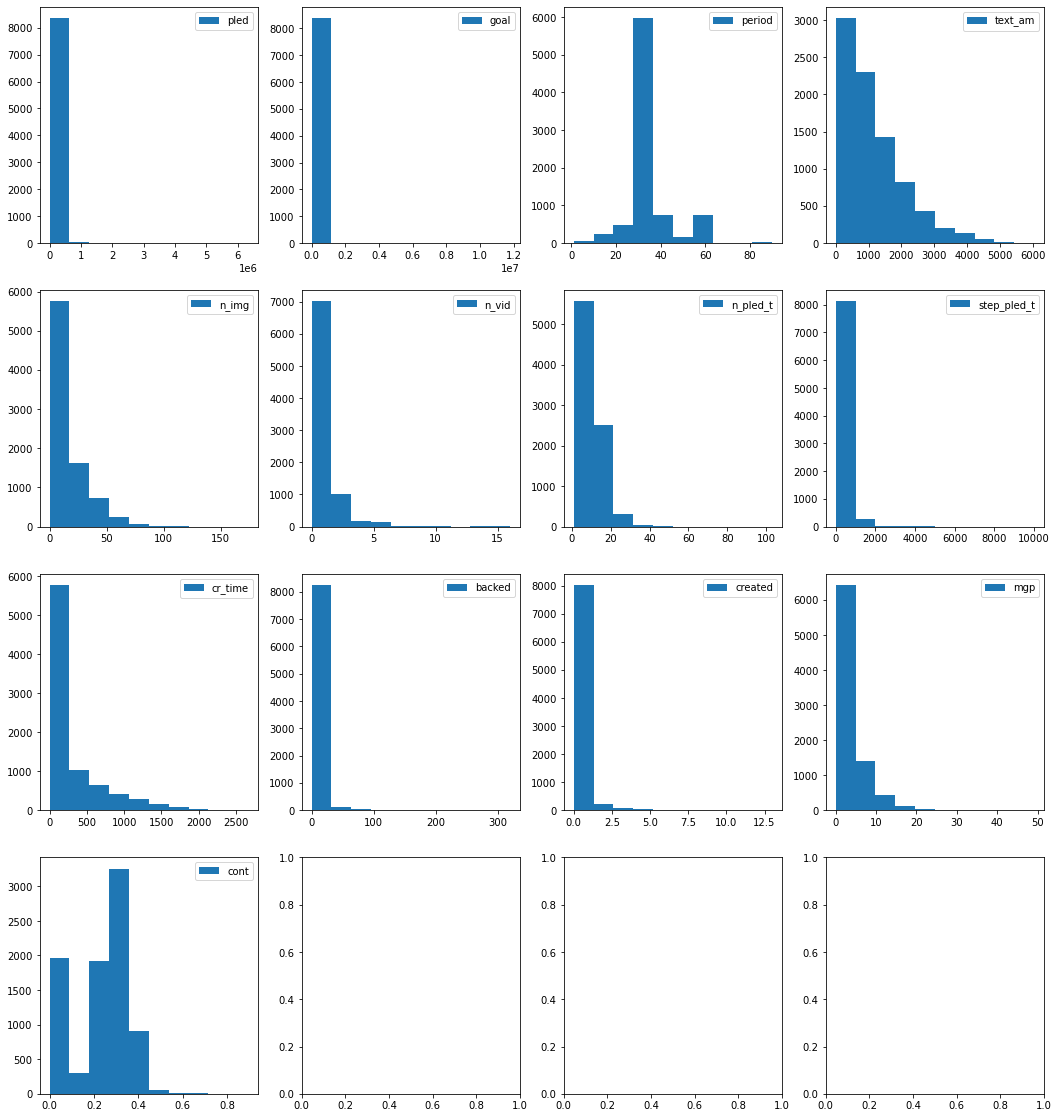

In [533]:
draw_hist(df, numeric_columns, 'bar')

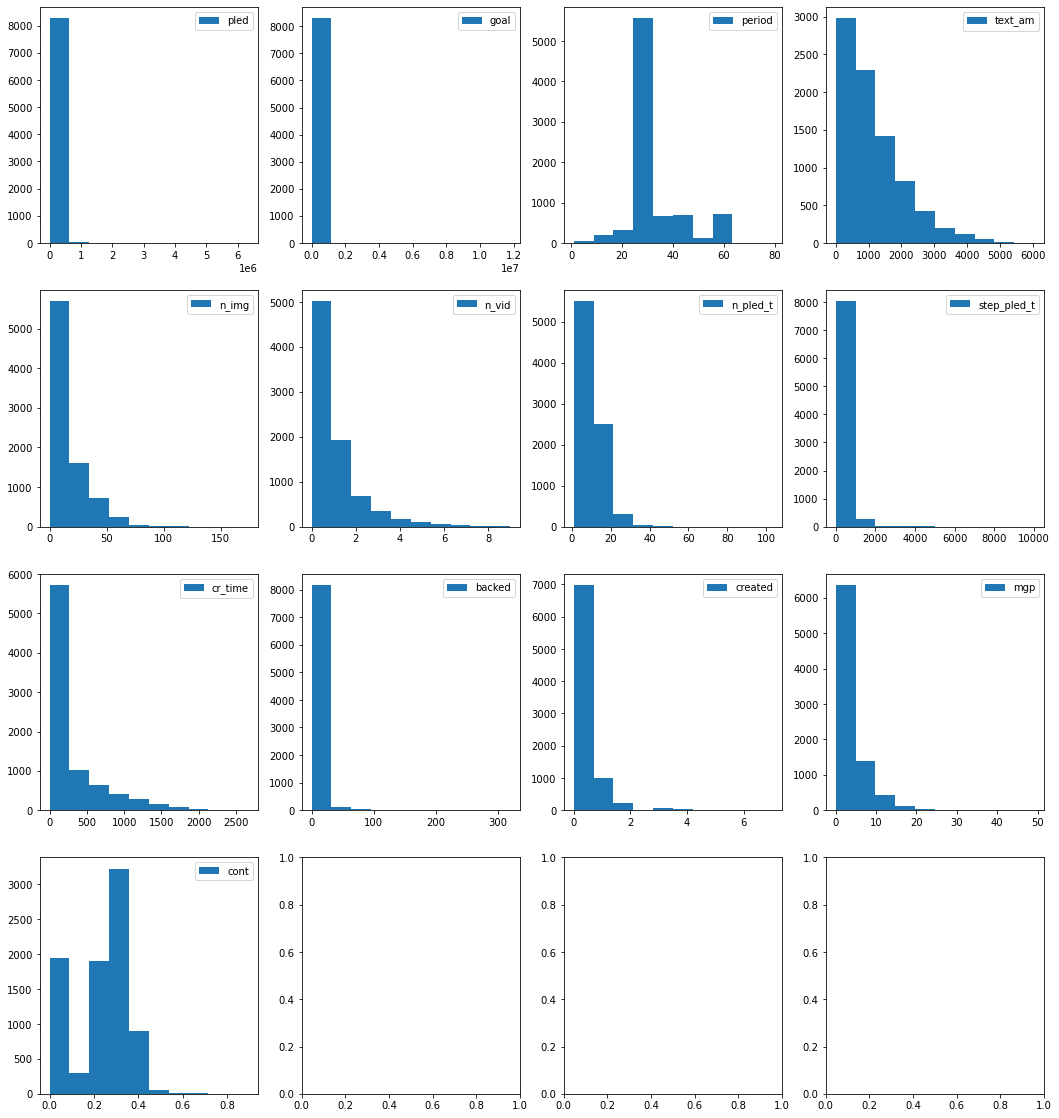

In [562]:
# Remove emissions
df = data
df = df[df['goal'] > 5]
df = df[df['created'] < 7.5]
df = df[df['period'] < 80]
df = df[df['n_vid'] < 10]
draw_hist(df, numeric_columns, 'bar')

In [563]:
df.shape

(8334, 39)

In [572]:
# Чекаем коеффициенты линейной регрессии - есть контакт!
model = LinearRegression()
scaler = StandardScaler()

X_train, x_test, y_train, y_test = train_test_split(df[numeric_columns[2:] + binary_columns], df[target_column], train_size=0.8)

scaler.fit(X_train)
trian_inp = scaler.transform(X_train)

In [573]:
model.fit(trian_inp, y_train)

preds = model.predict(trian_inp)

mean_squared_error(preds, y_train)

80.49774552980139

In [580]:
test_inp = scaler.transform(x_test)
preds = model.predict(test_inp)

mean_squared_error(preds, y_test), accuracy(preds, y_test)

NameError: name 'accuracy' is not defined

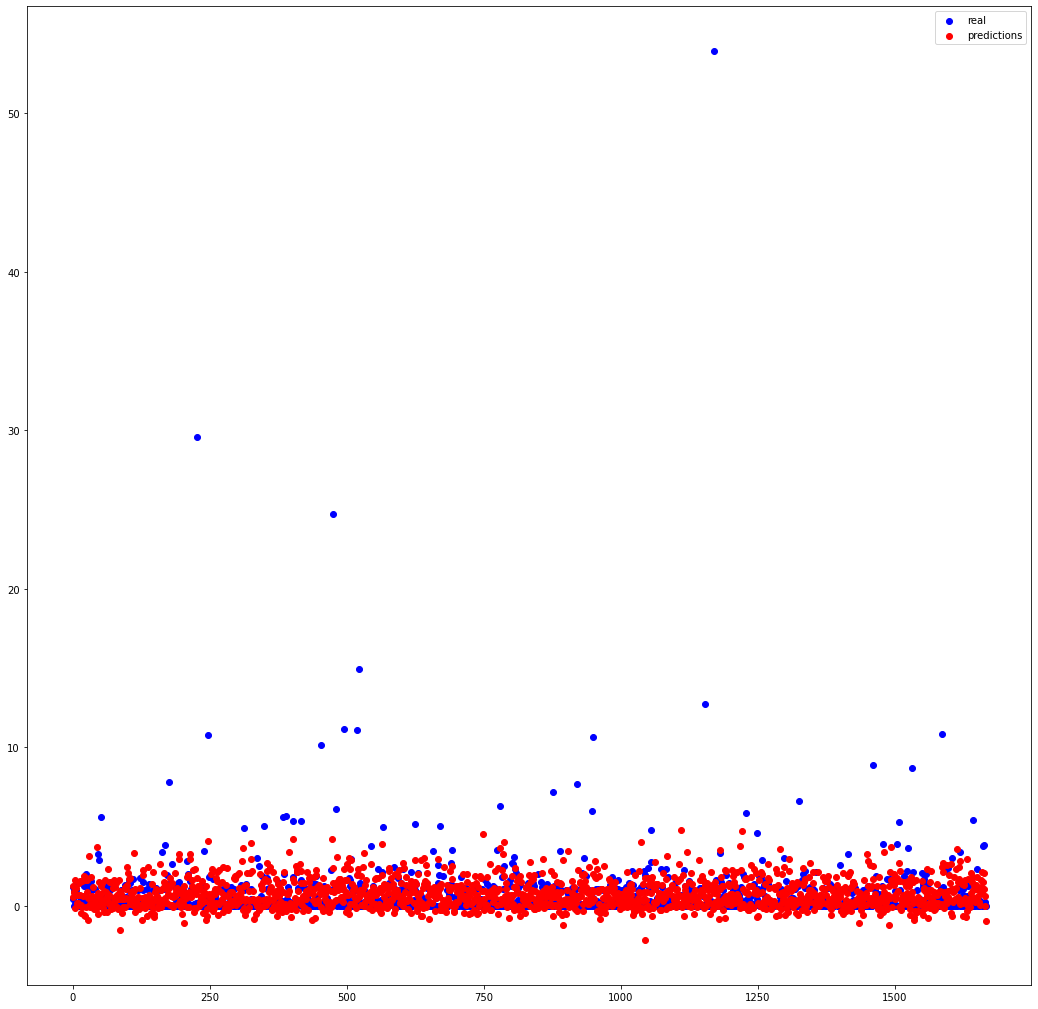

In [579]:
plt.figure(figsize=(18, 18))
plt.scatter(np.arange(len(y_test)), y_test, c='blue', label='real')
plt.scatter(np.arange(len(preds)), preds, c='red', label='predictions')
plt.legend()

In [577]:
{df[numeric_columns[2:] + binary_columns].columns[i]: model.coef_[i] for i in range(len(model.coef_))}

{'period': -0.10912971922437081,
 'text_am': -0.042893976095523256,
 'n_img': -0.16264534471962844,
 'n_vid': 0.37542851357027635,
 'n_pled_t': -0.2534912053403071,
 'step_pled_t': -0.09724539361387183,
 'cr_time': 0.4603048412857005,
 'backed': -0.06235357513748287,
 'created': -0.05382302731091196,
 'mgp': 0.4293696885642493,
 'cont': 0.065394053203663,
 'rpg': 0.22277410043879617,
 'platformer': 0.21554004254410114,
 'shooter': -0.04254781750003146,
 'fighting': -0.09988339882907496,
 'survival': -0.119211506868646,
 'horror': 0.181602027011434,
 'strategy': -0.09908266814627506,
 'arcade': -0.0008582913911186554,
 'simulator': 0.08538750263583328,
 'mmo': -0.08523625314246562,
 'indie': -0.03549599089126894,
 'action': -0.14066663617731726,
 'quest': 0.13352218907502048,
 'adventure': 0.0024743224653096894,
 'is_site': 0.1872766470873647}

In [550]:
df[numeric_columns[2:] + binary_columns + [target_column]].corr()['success_rate']

period         -0.046233
text_am         0.118307
n_img           0.125900
n_vid           0.189961
n_pled_t        0.111798
step_pled_t    -0.036080
cr_time         0.092520
backed          0.086471
created         0.089726
mgp             0.151227
cont            0.133940
rpg             0.068624
platformer      0.020164
shooter        -0.015992
fighting        0.010691
survival       -0.008712
horror         -0.004460
strategy       -0.002927
arcade          0.017845
simulator      -0.000382
mmo            -0.009368
indie           0.066127
action          0.007005
quest           0.041458
adventure       0.051660
is_site         0.081096
success_rate    1.000000
Name: success_rate, dtype: float64

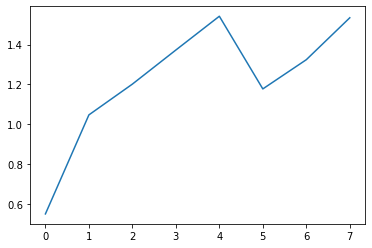

In [551]:
ys = []
for i in range(8):
    ys.append(df[df['created'] == i]['success_rate'].mean())
plt.plot(np.arange(8), ys)

In [396]:
df['cr_time'].value_counts()

1       217
0       202
2       200
3       188
4       167
       ... 
1669      1
1022      1
563       1
514       1
703       1
Name: cr_time, Length: 1377, dtype: int64

In [392]:
# Описательная статистика
df[numeric_columns].describe()

,pled,goal,period,text_am,n_img,n_vid,n_pled_t,step_pled_t,cr_time,backed,created,mgp,cont
count,8.334000e+03,8.334000e+03,8334.000000,8334.000000,8334.000000,8334.000000,8334.000000,8334.000000,8334.000000,8334.000000,8334.000000,8334.000000,8334.000000
mean,2.326118e+04,5.520756e+04,33.525078,1129.225942,14.366691,0.742741,10.054476,248.706567,276.598992,3.636069,0.243581,3.224531,0.224893
std,1.733014e+05,2.748420e+05,10.186690,912.834684,16.595821,1.264704,5.914297,379.749395,396.972715,11.294075,0.694869,4.053161,0.137463
min,0.000000e+00,7.910000e+00,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.705000e+01,3.661545e+03,30.000000,418.000000,1.000000,0.000000,6.000000,32.170670,15.000000,0.000000,0.000000,0.241630,0.151445
50%,7.685000e+02,1.000000e+04,30.000000,881.000000,8.000000,0.000000,9.000000,106.571429,81.000000,0.000000,0.000000,1.792527,0.269012
75%,6.374000e+03,3.846312e+04,33.000000,1590.750000,23.000000,1.000000,13.000000,334.807211,386.000000,3.000000,0.000000,4.698903,0.322285
max,6.333295e+06,1.179675e+07,79.000000,6042.000000,174.000000,9.000000,103.000000,9999.000000,2664.000000,320.000000,7.000000,49.141376,0.894847


In [417]:
df[numeric_columns].mode()

,pled,goal,period,text_am,n_img,n_vid,n_pled_t,step_pled_t,cr_time,backed,created,mgp,cont
0,0.0,10000.0,30,330,0,0,8,0.0,1,0,0,0.0,0.0


0.07990208708597493

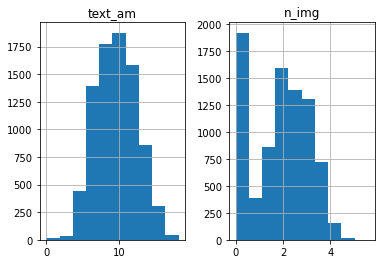

In [466]:
new_set = df[['text_am', 'n_img']]
(new_set ** (1 / 3)).hist()
None
df[df['n_img'] == 0]['success_rate'].mean()